# SVM

- 출처 : http://hleecaster.com/ml-svm-concept/

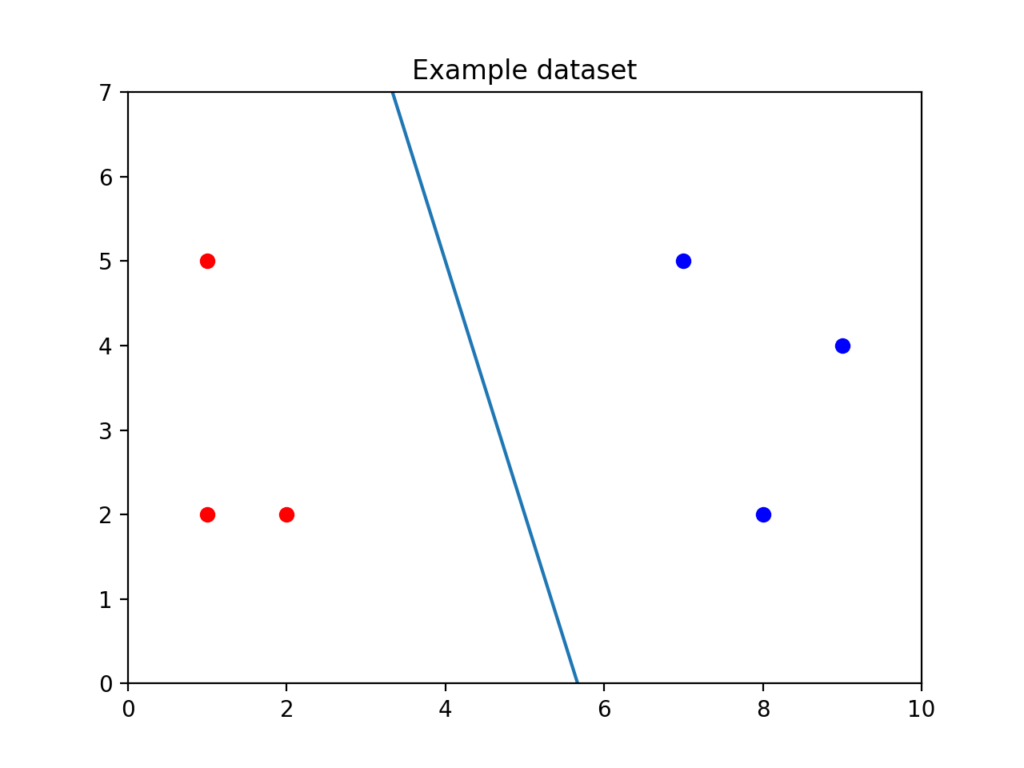

In [1]:
from sklearn.svm import SVC

classifier = SVC(kernel = 'linear')

training_points = [[1, 2], [1, 5], [2, 2], [7, 5], [9, 4], [8, 2]]
labels = [1, 1, 1, 0, 0, 0]

classifier.fit(training_points, labels)

# 어디로 분류될 것인가
print(classifier.predict([[3,2]]))

[1]


라벨 1번으로 분류되었다는 것을 볼 수 있다. 

In [2]:
classifier.support_vectors_

array([[7., 5.],
       [8., 2.],
       [2., 2.]])

서포트 벡터, 결정경계를 정의하는 서포트 벡터가 바로 이 세 개이다. 

그렇다면 이상치를 얼마나 허용할 것인가???

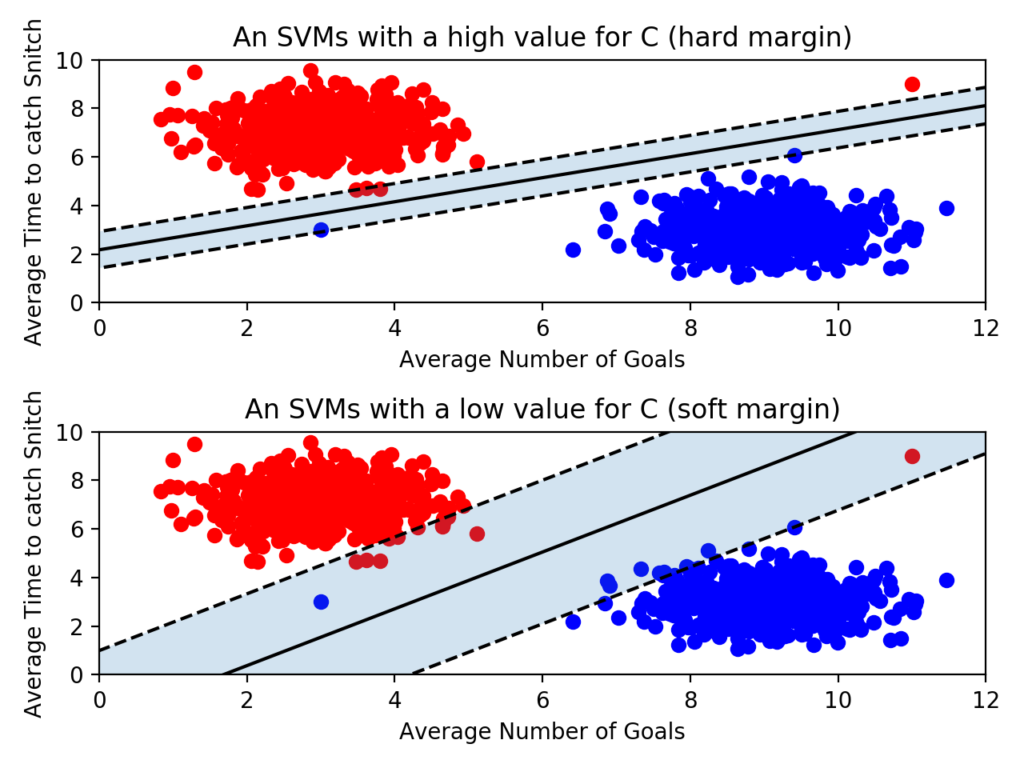

첫번째 그림을 본다면, 왼쪽에 혼자 튀어 있는 파란점과 오른쪽에 혼자 튀어 있는 빨간 점이 있다는 것을 확인할 수 있다. 이게 바로 **아웃라이어**이다

자세하게 살펴 본다면 

- 위의 그림은 아웃라이어를 허용하지 않고 기준을 까다롭게 세운 모양이다. 이것을 우리는 **하드 마진**이라고 한다. 
그리고 서포트 벡터와 결정 경계 사이의 거리가 매우 좁다. 즉, 마진이 매우 작아진다. 이렇게 개별적인 학습 데이터들을 다 놓치지 않으려고 아웃라이어를 허용하지 않는 기준으로 결정경계를 정해버리면 **오버피팅 문제**가 발생할 수 있다.

- 아래 그림은 아웃라이어들이 마진 안에 어느정도 포함되도록 너그럽게 기준을 잡았다. 이걸 **소프트 마진**이라고 한다. 이렇게 너그럽게 잡아 놓으니 서포트 벡터와 결정 경계 사이의 거리가 멀어졌다. 즉, 마진이 커진다. 대신 너무 대충대충 학습하는 꼴이라 **언더피팅** 문제가 발생할 수 있다.

**파라미터 C**

SVM 모델이 오류를 어느정도 허용할 것인지 파라미터 c를 통해 지정할 수 있다. (기본 값은 1이다.)

In [4]:
classifier = SVC(C = 0.01)

c값이 클수록 하드마진(오류 허용 안 함), 작을수록 소프트마진(오류를 허용함)이다.

당연히 c의 최적 값은 데이터에 따라 다르다. <br>
결국 여러가지 C값을 넣어보면서 모델을 검증하는 수밖에 없다. 

**커널(Kernel)**

지금까지는 선형으로 결정 경계를 그을 수 있는 형태의 데이터 세트를 예시로 들었다. 그런데 만약 SVM이 선형으로 분리할 수 없는 데이터 세스탁 있다면 어떻게 해야 할까?

극단적인 데이터이지만 다음과 같은 그림이 있다. 

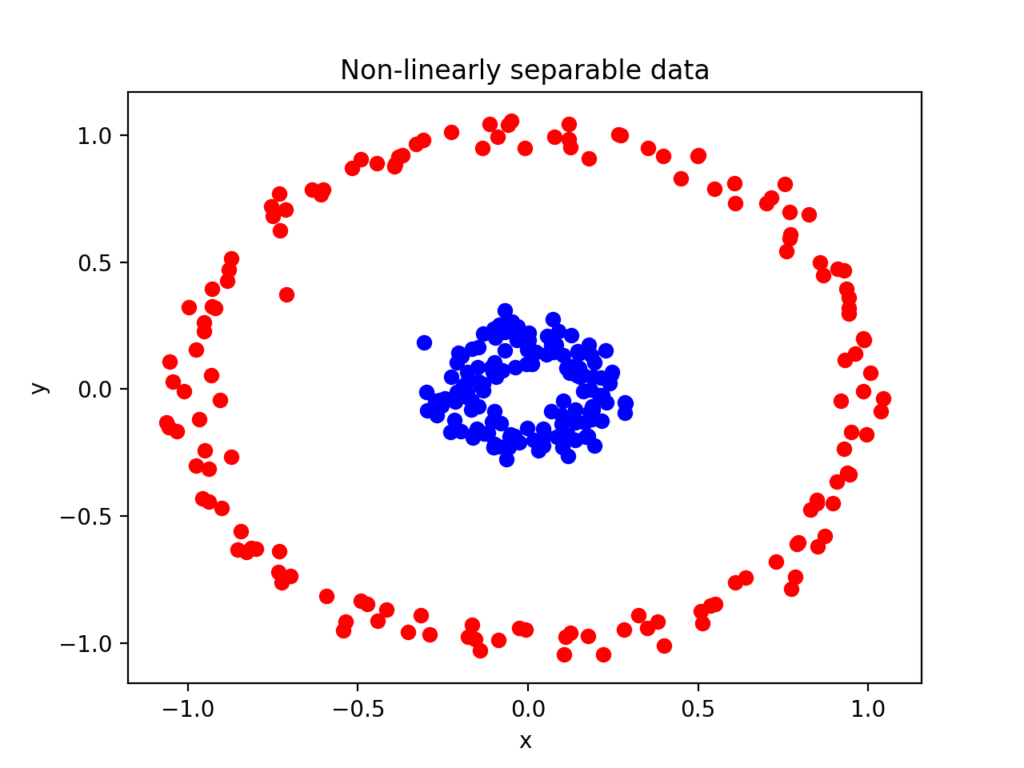


빨간색 점을 파란색 점과 분리하는 직선을 그릴 수 없다. 

그러나 다행히도 SVM모델을 만들때는 kernel을 지정하여 해결할 수 있다. 

보통은 이렇게 linear 으로 지정하지만

`from sklearn.svm import SVC classifier = SVC(kernel = 'linear')`

- 여기서 `poly` 같은 걸 넣어줄 수 있다. 다만, 다른 커널을 사용할 때 주의가 필요하다. 머신러닝 모델이 약간의 오차를 허용해야 하는 건 너무나 당연한 거라 단순히 outlier 때문에 선형으로 분리할 수 없다고 판단해서는 안된다. 일부 아웃라이어에 맞추기 위해 비선형으로 결정경계를 만들 필요가 없다는 뜻이다. 모든 점을 올바르게 분리하는 선을 그린다는 건 오버피팅 된다는 것이기 때문이다. 

## 1. 다항식(Polynomial)

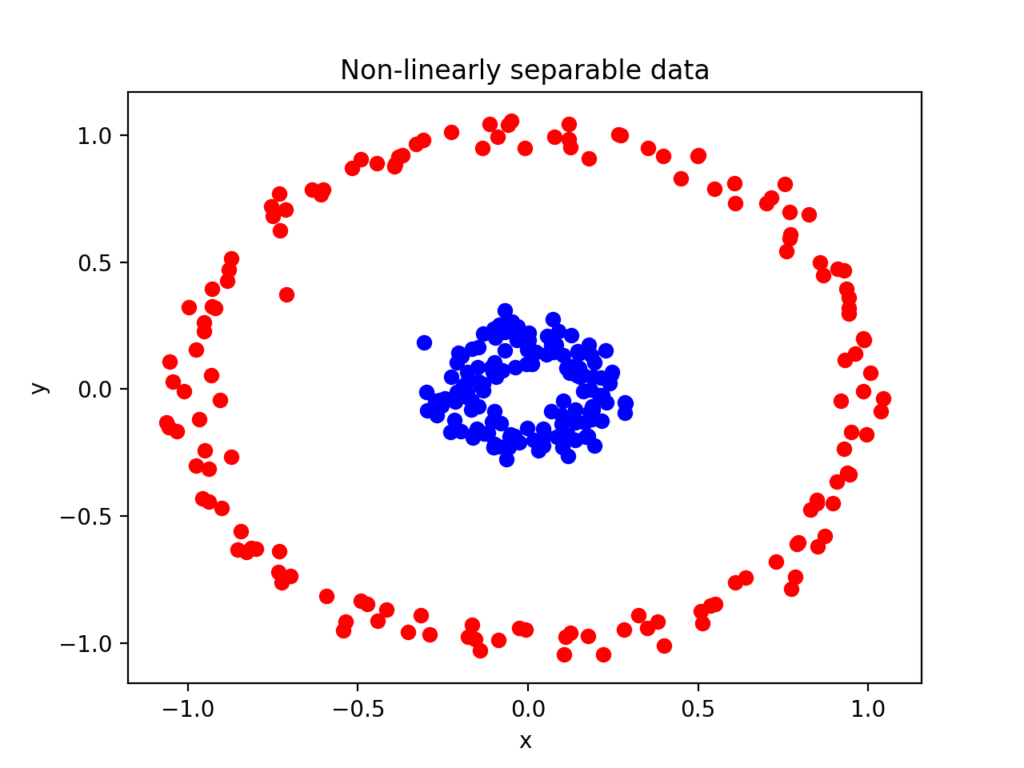

단순한 선형으로는 도저히 해결 불가 <br>

이때 **다항식(polynomial)** 커널을 사용하면 2차원에서 x,y좌표로 이루어진 점들을 아래와 같은 식에 따라 3차원으로 표현하게 된다.

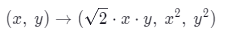

예를 들어 [1,2] 점이 있다고 하면 이렇게 3차원으로 계산해놓는다. 

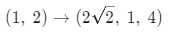

그리고 이렇게 다항식 커널로 계산한 데이터 포인트들을 3차원으로 그려보면 이런 모양이 나타난다.

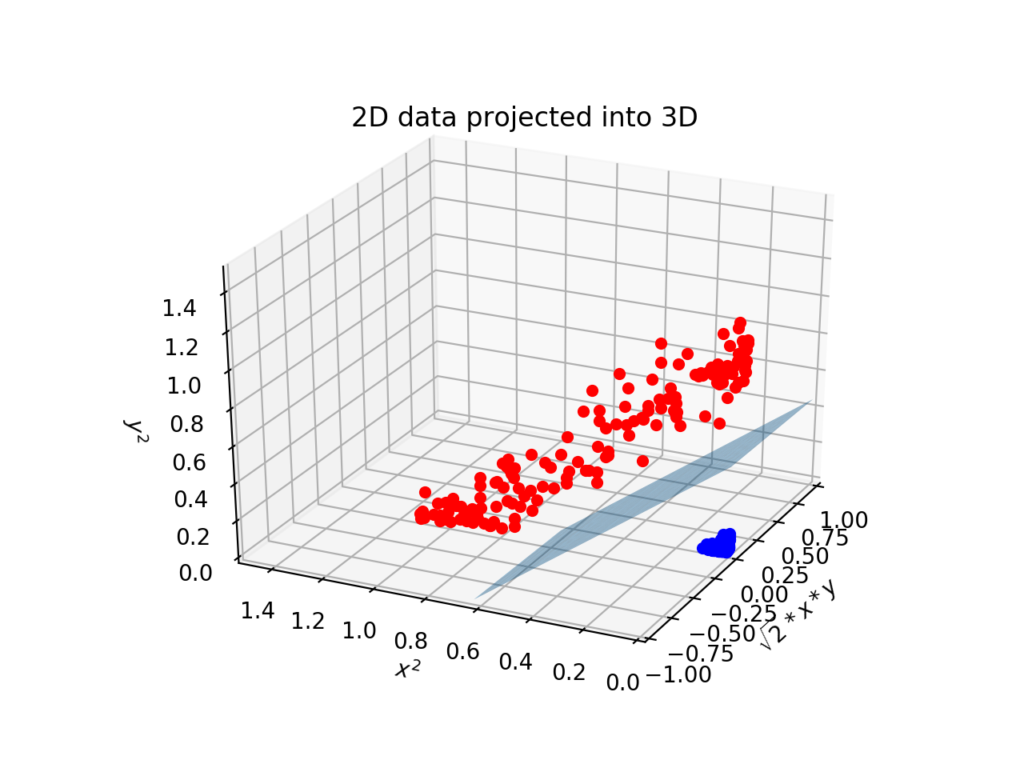

드디어 뭔가 결정 경계를 그려볼 수 있는 꼴로 바꼈다. 

이렇게 **다항식 커널을 사용하면 데이터를 더 높은 차원으로 변형하여 나타냄으로써 초평면의 결정 경계를 얻을 수 있다.**

### 2. 방사 기저 함수(RBF : Radial Bias Function)

이건 이름이 좀 어려운데, 보통 RBF 커널 혹은 가우시안 커널이라고 부르기도 한다. 

파라미터 kernel 값을 따로 안 넣어주었을 때의 기본값이 바로 이 `rbf`다. 

poly 커널은 2차원의 점을 3차원으로 변환했다면, 

RBF 커널은 2차원의 점을 무한한 차원의 점으로 변환한다. 그렇기에 시각화하는 건 어렵다. 

추가로 알아야할 것은 감마(gamma).

**파라미더 gamma**

`gamma`는 파라미터다. 

`classifier = SVC(kernel ='rbf', C=2, gamma =0.5)`

감마는 결정 경계를 얼마나 유연하게 그을 것인지 정해주는 거다. 학습 데이터에 얼마나 민감하게 반응할 것인지 모델을 조정하는 거니까 C와 비슷한 개념이라고 봐도 된다. 

감마값을 높이면 학습 데이터에 많이 의존해서 결정경계를 구불구불 긋게 된다. 이는 오버피팅 가능성UP

반대로 감마를 낮추면 학습 데이터에 별로 의존하지 않고 결정경계를 직선에 가깝게 긋게 된다. 언더피팅 가능성UP

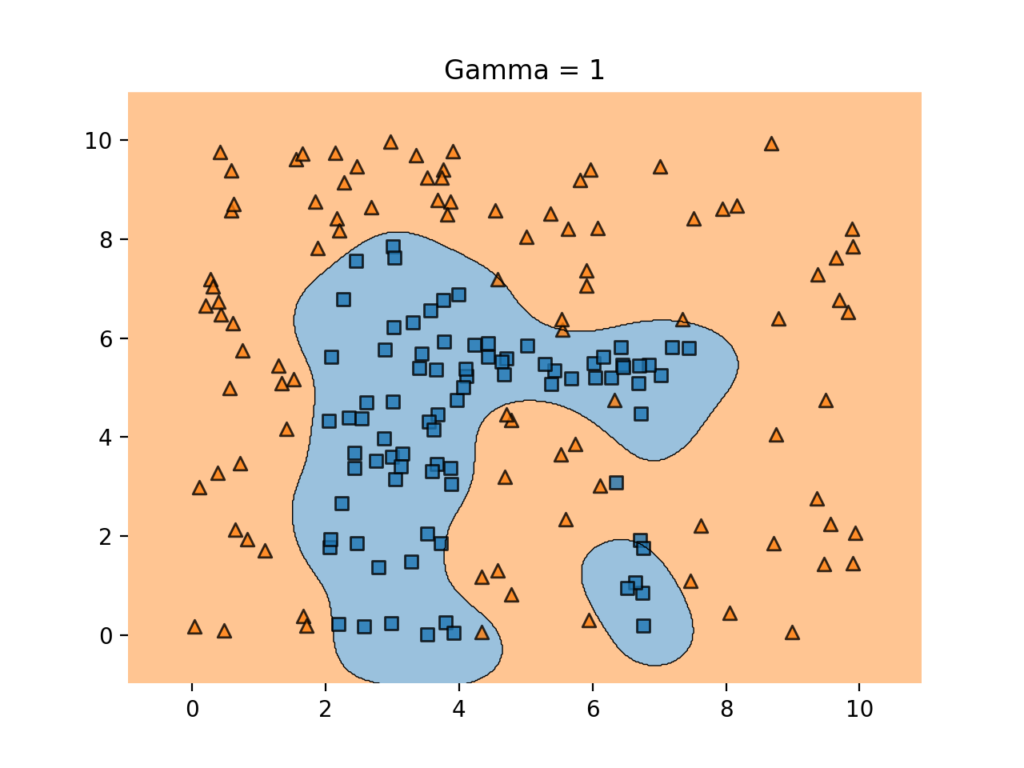

만약 `gamma`를 너무 높이면 이런 꼴이 되어 오버피팅이 발생한다.

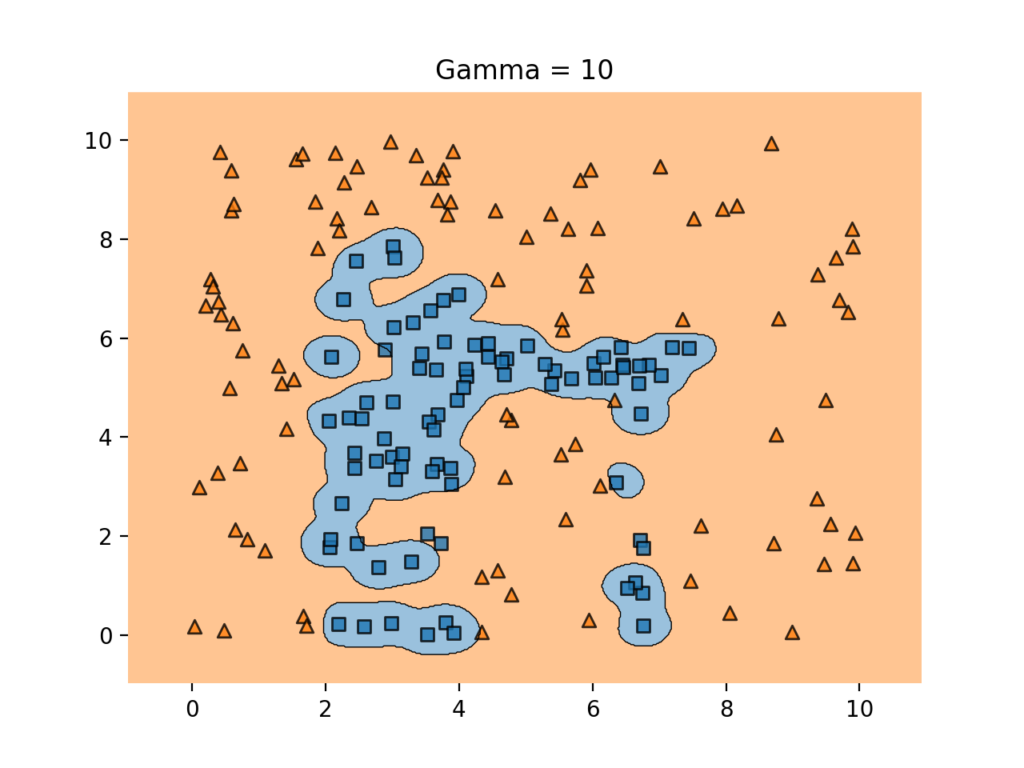

`gamma`를 너무 낮게 잡으면 이렇게 결정경계를 너무 대충 그려서 언더피팅이 발생한다. 

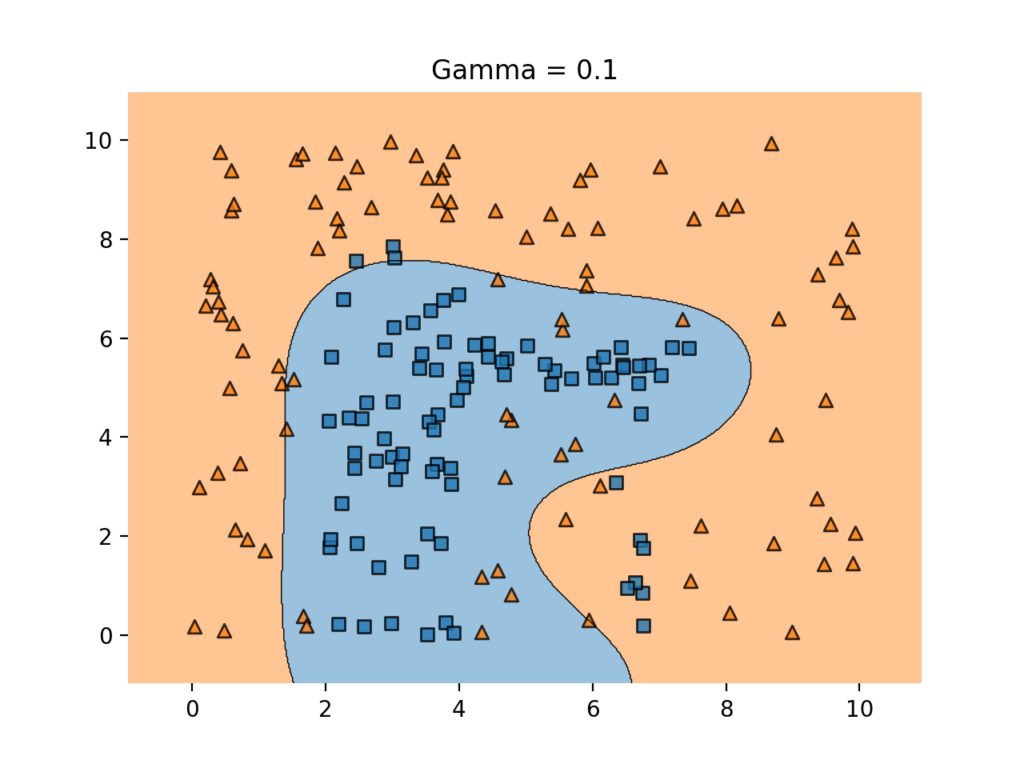

**요약**

- SVM은 분류에 사용되는 지도학습 머신러닝 모델이다. 

- SVM은 **서포트 벡터**를 사용해서 결정 경계를 정의하고 분류되지 않은 점을 해당 결정경계와 비교해서 분류한다. 

- 서포트 벡터는 결정경계에 가장 가까운 각 클래스의 점들이다. 

- 서포트 벡터와 결정경계 사이의 거리를 **마진**이라고 한다.

- SVM은 허용 가능한 오류 범위 내에서 가능한 최대 마진을 만들려고 한다. 

- 파리미터 C는 허용되는 오류 양을 조절한다. C값이 클수록 오류를 덜 허용하여 이를 **하드 마진**이라고 부른다.
  반대로 C값이 작을수록 오류를 더 많이 허용해서 **소프트 마진**을 만든다. 
    
- SVM에서는 선혀으로 분리할 수 없는 점들을 분류하기 위해 커널을 사용한다. 

- 커널은 원래 가지고 있는 데이터를 더 높은 차원의 데이터로 변환한다. 2차원의 점으로 나타낼 수 있는 데이터를 다항식 커널은 3차원으로 RBF커널은 점을 무한한 차원으로 변환한다. 

- RBF 커널에는 파라미터 감마가 있다. 감마가 너무 크면 학습 데이터에 너무 의존해서 오버피팅이 발생할 수 있다. 